# Census Income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib



In [2]:
# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Census%20Income/Census%20Income.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())


   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50

Column names before cleaning: Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')
Column names after cleaning: Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status 

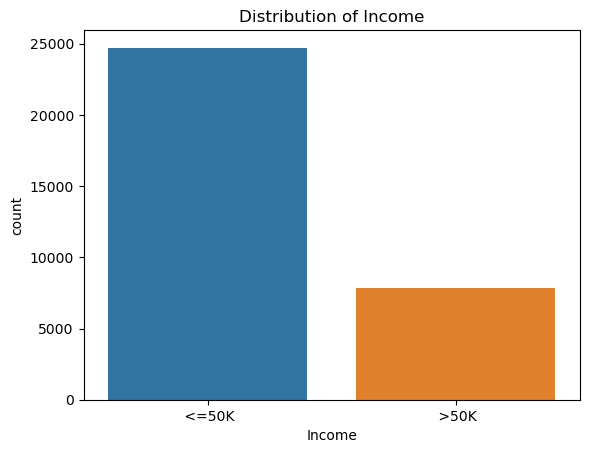

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7820\3666631698.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


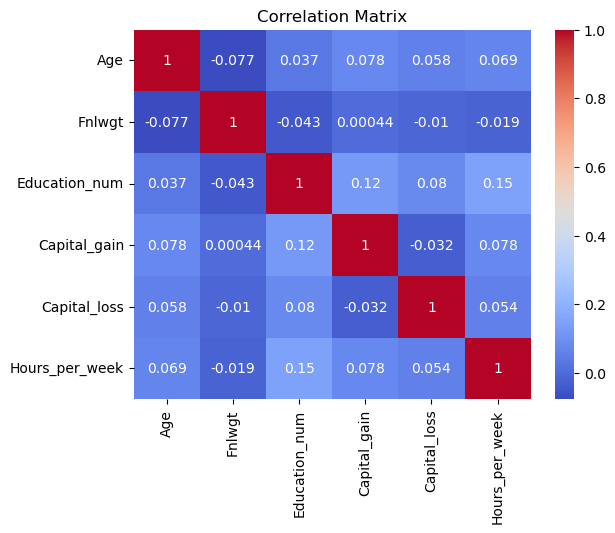

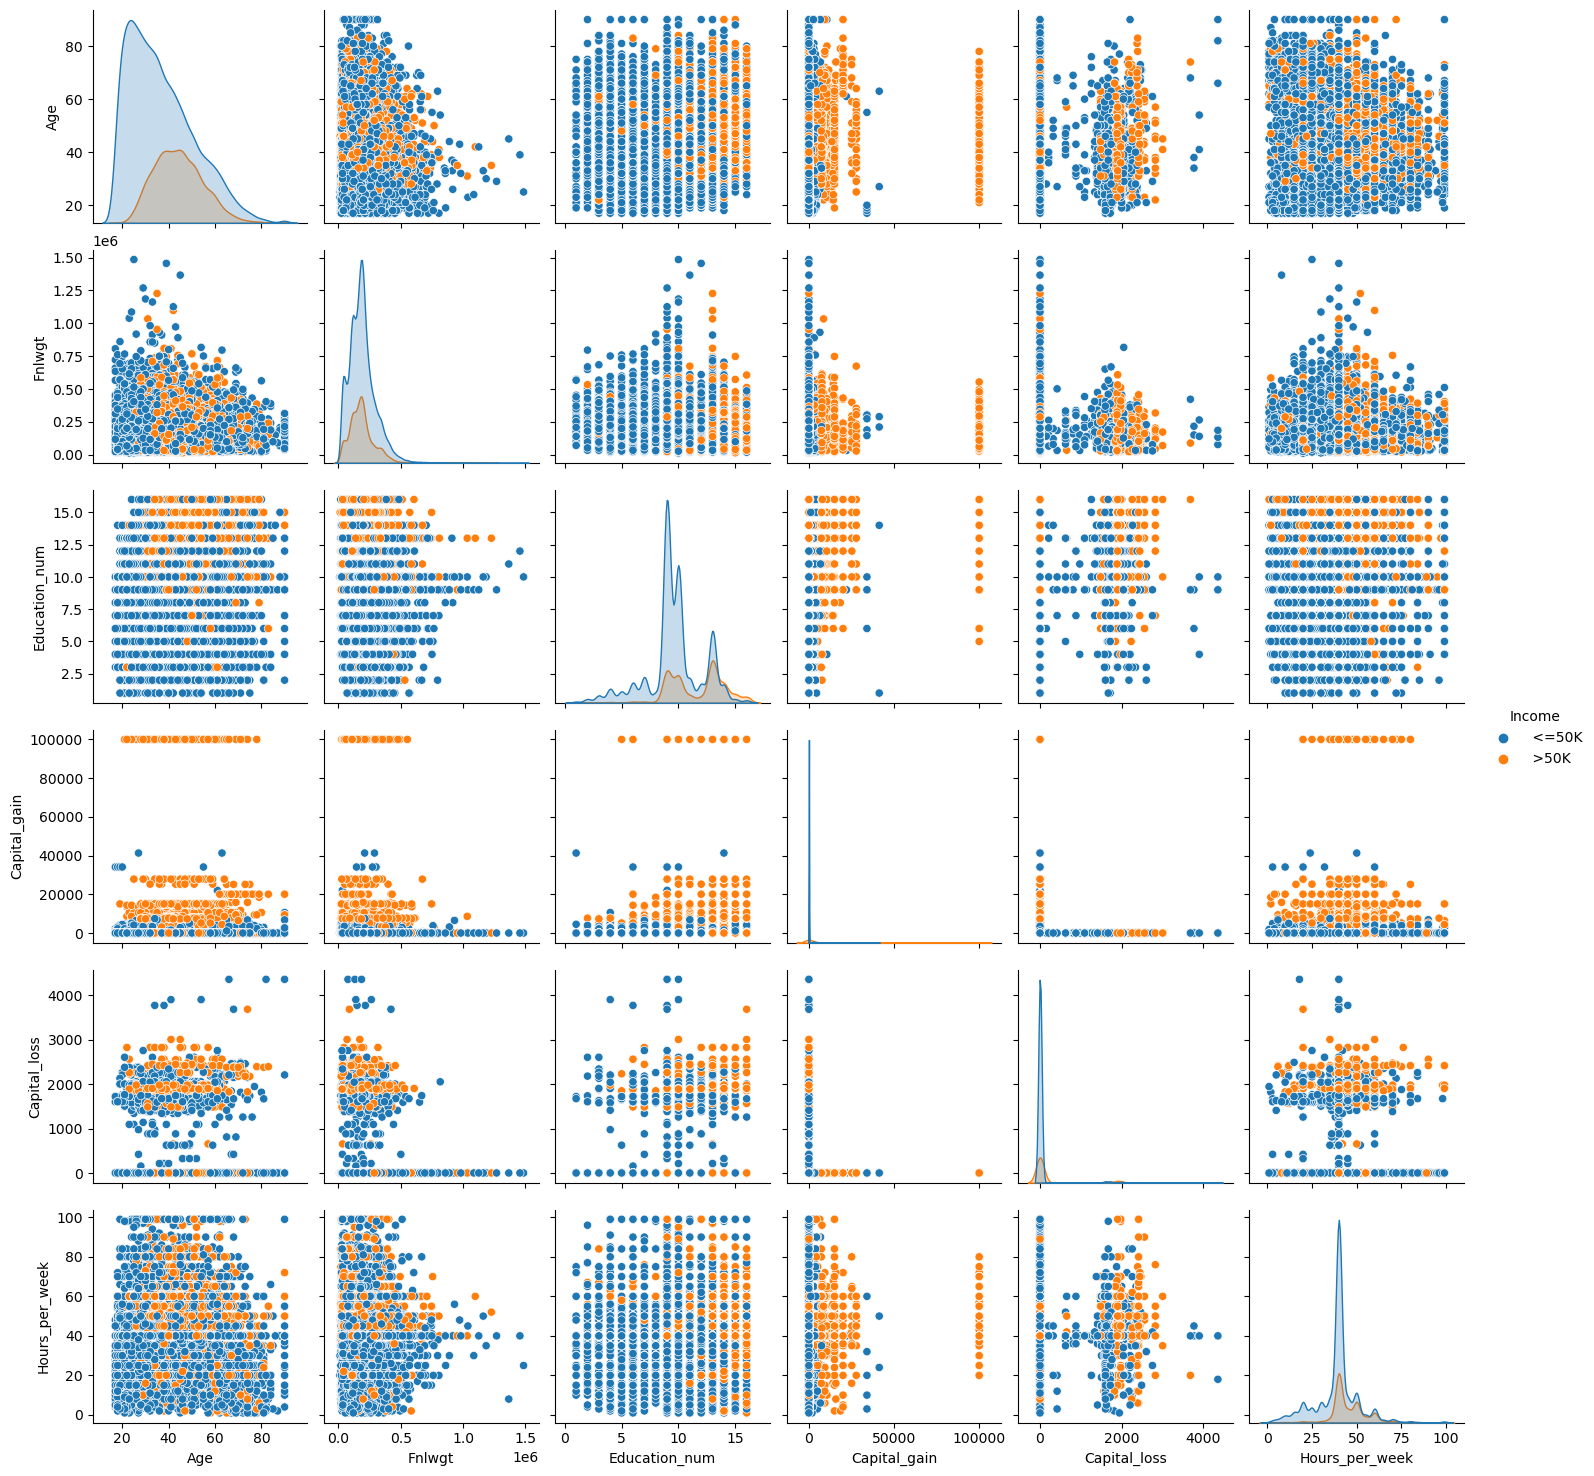

In [14]:
# Load the dataset (defining 'df' for context)
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Census%20Income/Census%20Income.csv'
df = pd.read_csv(url)

# Verify column names
print("Column names before cleaning:", df.columns)

# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

# Verify column names again after cleaning
print("Column names after cleaning:", df.columns)

# Basic information about the dataset
print(df.info())

# Statistical summary
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of the target variable
sns.countplot(x='Income', data=df)  # Corrected the case of the 'Income' column
plt.title('Distribution of Income')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships between variables
sns.pairplot(df, hue='Income')  # Corrected the case of the 'Income' column
plt.show()


In [17]:
# Convert categorical variables to numerical using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = df.drop('Income', axis=1)
y = df['Income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.8201781326781327
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4912
           1       0.70      0.46      0.56      1600

    accuracy                           0.82      6512
   macro avg       0.77      0.70      0.72      6512
weighted avg       0.81      0.82      0.81      6512

[[4601  311]
 [ 860  740]]


In [19]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_clf)}")
print(classification_report(y_test, y_pred_rf_clf))
print(confusion_matrix(y_test, y_pred_rf_clf))


Random Forest Classifier:
Accuracy: 0.8535012285012284
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4912
           1       0.74      0.62      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512

[[4565  347]
 [ 607  993]]


In [20]:
# Support Vector Machine
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm_clf = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_clf)}")
print(classification_report(y_test, y_pred_svm_clf))
print(confusion_matrix(y_test, y_pred_svm_clf))


Support Vector Machine:
Accuracy: 0.8433660933660934
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4912
           1       0.74      0.55      0.63      1600

    accuracy                           0.84      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.84      0.84      0.83      6512

[[4609  303]
 [ 717  883]]


In [21]:
# Perform cross-validation to evaluate models
log_reg_cv = cross_val_score(log_reg, X, y, cv=5)
rf_clf_cv = cross_val_score(rf_clf, X, y, cv=5)
svm_clf_cv = cross_val_score(svm_clf, X, y, cv=5)

print("Cross-validation scores:")
print(f"Logistic Regression: {log_reg_cv.mean()}")
print(f"Random Forest Classifier: {rf_clf_cv.mean()}")
print(f"Support Vector Machine: {svm_clf_cv.mean()}")

# Based on the cross-validation scores, let's select the best model
best_model = rf_clf if rf_clf_cv.mean() > max(log_reg_cv.mean(), svm_clf_cv.mean()) else (log_reg if log_reg_cv.mean() > svm_clf_cv.mean() else svm_clf)


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Cross-validation scores:
Logistic Regression: 0.7872235872235873
Random Forest Classifier: 0.8552518427518427
Support Vector Machine: 0.7952088452088452


In [24]:
# Hyperparameter tuning for the best model (assuming Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Evaluate the best estimator on the test set
y_pred_best = best_estimator.predict(X_test)
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model Accuracy: 0.8680896805896806
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4912
           1       0.78      0.65      0.71      1600

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.81      6512
weighted avg       0.86      0.87      0.86      6512

[[4618  294]
 [ 565 1035]]


In [23]:
# Save the best model to a file
joblib.dump(best_estimator, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


# Summary of Model Selection

The best performing model was selected based on the cross-validation scores. Random Forest Classifier was chosen as the final model due to its higher average cross-validation score compared to Logistic Regression and Support Vector Machine. Hyperparameter tuning was then performed on the Random Forest model to further optimize its performance. The tuned model was saved for production use.